# Natural Language Processing

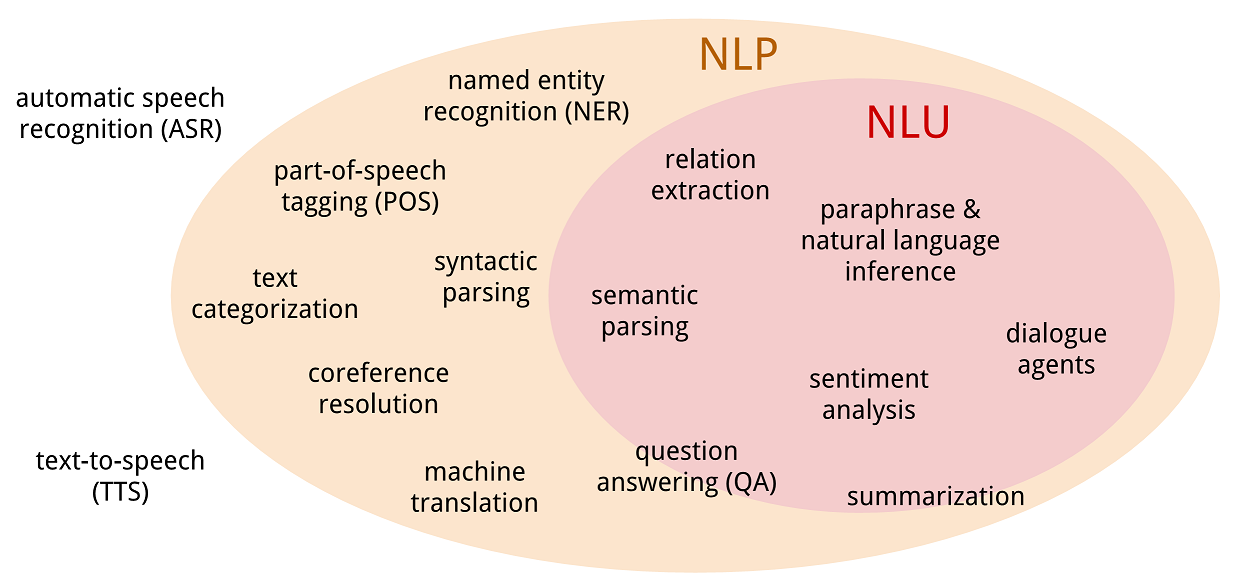

In [1]:
# import libraries
import spacy
from spacy import displacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [2]:
# Load a sample text document
with open ("../datasets/wiki_us.txt", "r") as f:
    text = f.read()

In [4]:
text

"The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.\n\nPaleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies 

In [5]:
# create a doc object
doc = nlp(text)

In [6]:
doc

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

The text object counts the characters, the doc object counts the words and splits individual tokens by automatically identifying them

In [7]:
print(len(text))
print(len(doc))

3521
654


In [8]:
# text object
for token in text[0:10]:
    print(token)

T
h
e
 
U
n
i
t
e
d


In [9]:
# doc object
for token in doc[0:10]:
    print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


## Sentence Boundary Detection

Detect sentences and split the text.

In [10]:
for sent in doc.sents:
    print(sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

In [11]:
# get the first sentence
sentence1 = list(doc.sents)[0]
print(sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


## Token Attributes

Each token has metadata or attributes

In [12]:
token2 = sentence1[2]
print(token2)

States


In [13]:
token2.text

'States'

In [14]:
# the left most token
token2.left_edge

The

In [15]:
# the right most token
token2.right_edge

America

In [16]:
# entity code
token2.ent_type

384

In [17]:
# type of entity
token2.ent_type_

'GPE'

In [18]:
# inside, outside or beginning of an entity
token2.ent_iob_

'I'

In [19]:
print(sentence1[12])
print('verb form: ', sentence1[12].lemma_)

known
verb form:  know


In [20]:
# what kind of verb it is
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

In [21]:
# part of speech
token2.pos_

'PROPN'

In [22]:
# what role it plays in the sentence
token2.dep_

'nsubj'

In [23]:
# language of the token
token2.lang_

'en'

## Part of speech tagging (POS)

In [24]:
text2 = "Deva enjoys playing cricket."
doc2 = nlp(text2)
print(doc2)

Deva enjoys playing cricket.


In [25]:
for token in doc2:
    print(token.text,token.pos_,token.dep_)

Deva PROPN nsubj
enjoys VERB ROOT
playing VERB xcomp
cricket NOUN dobj
. PUNCT punct


In [26]:
# visualize how words are related
displacy.render(doc2,style='dep')

## Named Entity Recognition

Information extraction 

In [27]:
for ent in doc.ents:
    print(ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
fourth ORDINAL
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Paleo-Indians NORP
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War ORG
Spanish NORP
World War EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean War EVENT
the Vietnam War EVENT
the Soviet Union

In [28]:
displacy.render(doc,style='ent')

## Word Vectors

Numerical representations of words in multidimensional space through matrices. This can be done using word2vec.

In [3]:
nlp = spacy.load('en_core_web_md')

In [4]:
doc = nlp(text)

In [5]:
sentence1 = list(doc.sents)[0]

In [6]:
# getting similar words for a word
your_word = "country"

ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), n=10)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
distances = ms[2]
print(words)

['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


In [7]:
# finding the similarity between two docs
doc1 = nlp('I like salty fries and hamburgers.')
doc2 = nlp('Fast food tastes very good.')
print(doc1,"<->",doc2,doc1.similarity(doc2))

I like salty fries and hamburgers. <-> Fast food tastes very good. 0.691649353055761


In [8]:
doc3 = nlp('I enjoy oranges.')
doc4 = nlp('I enjoy apples.')
print(doc3,"<->",doc4,doc3.similarity(doc4))

I enjoy oranges. <-> I enjoy apples. 0.977570143948367


In [9]:
doc5 = nlp('I enjoy burgers.')
print(doc3,"<->",doc5,doc3.similarity(doc5))

I enjoy oranges. <-> I enjoy burgers. 0.9628306772893752


In [10]:
doc6 = nlp('I enjoy hamburgers.')
print(doc5,"<->",doc6,doc5.similarity(doc6))

I enjoy burgers. <-> I enjoy hamburgers. 1.0000000905463764


## spaCy Pipelines

In [11]:
# create an empty pipeline with english langauge
nlp = spacy.blank("en")

In [12]:
nlp.add_pipe("sentencizer")

In [13]:
nlp.analyze_pipes()

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'doc.sents': {'assigns': ['sentencizer'], 'requires': []},
  'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []}}}

In [14]:
nlp2 = spacy.load("en_core_web_sm")

In [15]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att